## Theory

The Gaussian Mixture Model is a generative model that assumes that data are generated from multiple Gaussion distributions each with own Mean and variance. the Gaussian Mixture Models or Mixture of Gaussians models a convex combination of the various distributions.

<img src="GMM.png">

Unlike K-Means, with **Gaussian Mixture Models** we want to define a probability distribution on the data. In order to do that, we need to convert our clustering problem into an inference problem.

**Given:** $ x_1,x_2,...,x_n$, Where $ x \in I\!R^d$

Let $ \pi$ be a K-dimensional probability distribution and ($ \mu_k;\Sigma_k$)
be the mean and covariance of the $ k^{th}$ Gaussian in $I\!R^d$.

We want to make the following hypothesis on how the data was generated:

- Assign the $i$th observation to a cluster, $ c_i \sim Discrete(\pi)$

- Generate the value of the observation, $e x_i \sim  N(\mu_{c_i} ;\Sigma_{c_i} )$ where $ \mu = \{\mu_1,...,\mu_k\}$ and $ \Sigma = \{\Sigma_1,...,\Sigma_k\}$

**Goal:** We want to learn $ \pi;\mu$ and $ \Sigma$. 


This is an inference goal. we've defined a hypothesis on how the data was generated which in return defines a joint likelihood on the data given some parameters. now that we have the data, our goal is to go back and infer what parameters could have generated the data.

We are going to use the maximum likelihood approach to do the inference in the **GMM**.

Our problem can now be noted like this:

$ p(x_1,...,X_n|\pi,\mu,\Sigma)  =  \prod_{i=1}^n p(x_i|\pi,\mu,\Sigma)$ (i.i.d)

Notice that $ c_i$ is missing. this is because we integrated it out. we can bring it back to the equation as a joint likelihood of $ x_i$ given the parameters $\large \pi,\mu$ and $ \Sigma$.

$ p(x_1,...,X_n|\pi,\mu,\Sigma)  =  \prod_{i=1}^n p(x_i|\pi,\mu,\Sigma)  =  \prod_{i=1}^n \sum_{k=1}^K p(x_i,c_i=k|\pi,\mu,\Sigma)$

our goal now is to maximize the $ p(x_1,...,X_n|\pi,\mu,\Sigma)$. taking a derivative of a product would be very hard. let's instead use the log likelihood of $ p(x_1,...,X_n|\pi,\mu,\Sigma)$.

$ \ln p(x_1,...,X_n|\pi,\mu,\Sigma) = \sum_{i=1}^n ln \sum_{k=1}^K p(x_i,c_i=k|\pi,\mu,\Sigma)$

Oooh no! the ln after the first summation make it hard to find the maximum by applying the derivative of the function and assign it to zero. we need to find an iterative algorithm to find the estimate of parameters that maximize the likelihood of our function.

## Expectation Maximization (EM) to the rescue

Let's now introduce the concept of **EM**. I am not going to derive all the formula of **EM**, maybe next time if I have enough time, but I will do my best to present the essentials of **EM**. let's remind ourselves about some probability properties:

For discrete variables, the marginal probability mass function of $ X$ is 

>$ p(X=x) = \sum_y p(X=x,Y=y)  = \sum_y p(X=x| Y=y) P(Y=y)$

For continuous variables, the mariginal probability density function of $ X$ is 

>$ p(X) = \int p(X,Y)  dY = \int p(X|Y) p(Y) dY$

now let's add one more important rule: 

>$ p(X|\theta_1) = \int p(X,Y|\theta_1)  dY = \int p(X|Y,\theta_1) p(Y|\theta_1) dY$

Using the above rules, the **EM** states that the following statement for the objective function as true:

$ ln  p(x|\theta_1) =  \int q(\theta_2) ln {\large \frac{p(x,\theta_2|\theta_1)}{q(\theta_2)}}d\theta_2 + \int q(\theta_2) ln {\large \frac{q(\theta_2)}{p(\theta_2|x,\theta_1)}}d\theta_2$

we assume the following:

- $ q(\theta_2)$ is any probability distribution (assumed continuous for now)
- We assume we know $ p(\theta_2|x,\theta_1)$. That is, given the data $ x$ and fixed
values for $ \theta_1$, we can solve the conditional posterior distribution of $ \theta_2$.

**EM** then split our desired objective function in two:

- $ \int q(\theta_2) ln {\large \frac{p(x,\theta_2|\theta_1)}{q(\theta_2)}}d\theta_2$ is called $ L$
- $ \int q(\theta_2) ln {\large \frac{q(\theta_2)}{p(\theta_2|x,\theta_1)}}d\theta_2$ is called Kullback-Leibler divergence or $ KL$ divergence

Some more observations about the right hand side:

- The $ KL$ divergence is always $ >= 0$ and only $ = 0$ when $ q = p$.
-  We are assuming that the integral in $ L$ can be calculated, leaving a function only of $ \theta_1$ (for a particular setting of the distribution q).

## The EM algorithm
The **EM** algorithm is an iterative one. assume we have $\large \theta_1^{(t)}$ at time $t$. find $\large \theta_1^{(t+1)}$ as follows:

**E-step:** Set $ q_t(\theta_2) = p(\theta_2|x,\theta_1^{(t)})$ and calculate 

$ L_1(x,\theta_1) = \int q_t(\theta_2) ln {\large \frac{p(x,\theta_2|\theta_1)}{q(\theta_2)}}d\theta_2 = \int q_t(\theta_2) ln p(x,\theta_2|\theta_1)d\theta_2$. 

The $\large ln$ converts the denominator into subtraction but we can ignore the term since it does not involve $\large \theta_1$ 

**M-step:** Set $ \theta_1^{(t+1)} = argmax_{\theta_1} L_1(x,\theta_1)$

Use $ \theta_1^{(t+1)}$ to get $ \theta_1^{(t+2)}$ and keep iterating until the parameters are no longer improving.




## The EM objective for the Gaussian mixture model

Using the **EM** notation, we can rewrite our **GMM** objective function as :

$ \sum_{i=1}^n ln p(x_i|\pi,\mu,\Sigma) = \sum_{i=1}^n \sum_{k=1}^K q(c_i=k)  ln  {\large \frac{p(x_i,c_i=k|\pi,\mu,\Sigma)}{q(c_i=k)}} + \sum_{i=1}^n \sum_{k=1}^K  q(c_i=k) ln {\large \frac{q(c_i=k)}{p(c_i=k|x_i,\pi,\mu,\Sigma)}}$

### EM SETUP (ONE ITERATION)

**First:** Set $ q(c_i=k) \Leftarrow p(c_i = k|x_i,\pi,\mu,\Sigma)$ using Bayes rule:

$ p(c_i = k|x_i,\pi,\mu,\Sigma)$ $ \alpha$ $ p(c_i = k|\pi)p(x_i|c_i=k,\mu,\Sigma)$

We can solve the posterior of $\large c_i$ given $\large \pi,\mu$ and $\large \Sigma$ :

$ q(c_i = k) = {\large \frac{\pi_k \mathcal{N}(x_i|\mu_k,\Sigma_k)}{\sum_j \pi_j \mathcal{N}(x_i|\mu_j,\Sigma_j)}} \Rightarrow \phi_i(k)$

**E-step:** Take the expectation using the updated q’s

$ Q = \sum_{i=1}^{n} \sum_{k=1}^{K} \phi_i(k) ln p(x_i,c_i=k|\pi,\mu_k,\Sigma_k) + $ constant w.r.t $ \pi, \mu, \Sigma$

$ ln p(x_i,c_i=k|\pi,\mu_k,\Sigma_k) = ln \pi_k + ln \mathcal{N}(x_i|\mu_k,\Sigma_k)$

**M-step:** Maximize $\large Q$ with respect to $\large \pi$ and each $\large \mu_k, \Sigma_k$

## Algorithm

**Given:** $ x_1,...,x_n$ where $ x \in I\!R^d$ 

**Goal*:** Maximize $ L = \sum_{i=1}^{n} ln p (x_i|\pi,\mu,\Sigma)$

- Iterate until incremental improvement to $\large L$ is "small" 

    1. **E-Step:** For $ i=1,...,n$, set 
    $ \phi_i(k) = {\large \frac{\pi_k \mathcal{N}(x_i|\mu_k,\Sigma_k)}{\sum_j \pi_j \mathcal{N}(x_i|\mu_j,\Sigma_j)}}$, for $ k = 1,...,K$
    
    2. **M-step:** For $ k=1,...,K$, define $ n_k = \sum_{i=1}^{n} \phi_i(k)$ and update the values:
    
    $ \pi_k = {\large \frac{n_k}{n}}$, $ \mu_k = {\large \frac{1}{n_k}}\sum_{i=1}^n \phi_i(k)x_i$, $ \Sigma_k = {\large \frac{1}{n_k}}\sum_{i=1}^n \phi_i(k)(x_i-\mu_k)(x_i-\mu_k)^T$
    
    The update value for $\large \mu_k$ is used when updating $\large \Sigma_k$.

### In summary 

Maximum likelihood for the Gaussian mixture model can overfit the data. It will learn as many Gaussians as it’s given.

There are a set of techniques for this based on the Dirichlet distribution. A Dirichlet prior is used on $\large \pi$ which encourages many Gaussians to
disappear (i.e., not have any data assigned to them). we won't cover that in this post.



## Practice

In the next few cells we will apply the above theory into practice and show how to implement a GMM algorithm with EM in pyhton. although we will derive everything from scratch, in practice there are already well optimised ***scikit-learn functions*** that you can use to get this done quickly. we will show the raw code to enhance the understanding of what you've just learned above.

In this tutorial we will use the Iris dataset. it is made of the following details:

1. Number of Instances: 150 (50 in each of three classes)

2. Number of Attributes: 4 numeric, predictive attributes and the class

3. Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

4. Missing Attribute Values: None

For this dataset we already know the labels. however we will trim the labels column and use the remaining of the attributes to categorise the data into three clusters. again we are using the prior knowledge that there are 3 classes of data. in real life you may not know much about the data and you have to find the number $K$ of clusters via different approaches such us looking at the relative decrease in $L$. If $K^$ is best, then increasing $K$
when $K \leq K^*$ should decrease $L$ much more than when $K > K^*$. 


In [1]:
from scipy.stats import multivariate_normal
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn import datasets
%matplotlib inline

The dataset used in this tutorial can be downloaded from [ICS UCI university](https://archive.ics.uci.edu/ml/datasets/iris) or you can use sklearn. see an example [here](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

In [2]:
#data_path = "./iris.data"
iris = datasets.load_iris()
column_names = ["sepal_length","sepal_width","petal_length","petal_width","label"]
iris_data = iris.data
iris_target = np.reshape(iris.target,(-1,1))

concat_iris_data = np.concatenate((iris_data, iris_target), axis=1)
df = pd.DataFrame(concat_iris_data, columns = column_names)

In [3]:
#show random 5 samples
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,label
57,4.9,2.4,3.3,1.0,1.0
93,5.0,2.3,3.3,1.0,1.0
16,5.4,3.9,1.3,0.4,0.0
85,6.0,3.4,4.5,1.6,1.0
37,4.9,3.6,1.4,0.1,0.0


Although the purpose of this tutorial is not to analyse the data, let's have a quick look at the some stats of the distribution. df.describe().T will be handy

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
label,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


The Iris dataset is a very simple dataset. it has only 4 dimensions to analyse. let's plot this data and color them according to the label they belong to. However, we can't plot all the 4 dimensions at time. and choosing two and ignore other would still not perfectly representing the distribution. let's use a technique called PCA (Principle Component Analysis) to project the 4 dimensions into 2. the reduced-dimensions data points will not be used to train the cluster, However, it will be handy to show how the cluster chose the centroids and how close the cluster are to the ground truth labels.

In [5]:
X = df.iloc[:,:4].values
y = df.iloc[:,4].values

#Project data to lower dimension using PCA
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

#create a dataframe combining the low dimension data and to be used for visualization
low_dim_data = {
        'X1': X[:,0],
        'X2': X[:,1],
        'label': y}
low_dim_df = pd.DataFrame(low_dim_data, columns = ['X1', 'X2', 'label'])

In [6]:
low_dim_df.sample(5)

,X1,X2,label
84,0.588006,-0.484287,1.0
103,1.971531,-0.179728,2.0
56,1.095061,0.283468,1.0
54,1.088103,0.074591,1.0
129,2.388003,0.464640,2.0


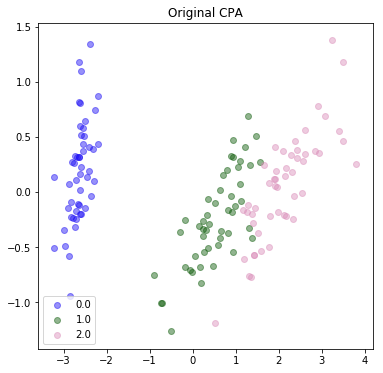

In [7]:
# Create Figure
fig, (axs) = plt.subplots(1,1, figsize = (6,6))

# Plot each group in each dataset as unique olor
for ax, low_dim_df in zip([axs], [low_dim_df]):
    ax.set_title('Original CPA')
    for cat, col in zip(low_dim_df['label'].unique(), ['#190BF5', '#0B5A07', '#DA8DB9']):
        ax.scatter(low_dim_df[low_dim_df.label == cat].X1, low_dim_df[low_dim_df.label == cat].X2, c = col, label = cat, alpha = .45)
    ax.legend()

Let's first initialise centroids. Each centroid w ill be defined by an $(x_1,x_2,x_3,x_4)$ of coordinates. 
To initialize the clusters, a K-means++ type algorithm will be used.
K-means++ picks one point from the data to be the first cluster center. Subsequent cluster centers are picked from the remaining "unpicked" points. However, the probability of picking any one point is proportional to the euclidean distance from that point to the nearest cluster center squared.

In [8]:
# Implement K-means ++ to initialize centers
def pick_cluster_centers(points, num_clusters = 3):
    # Create List to store clusters
    clusters = []
    # Save list of cluster indicies
    arr_idx = np.arange(len(points))
    # Choose first cluster; append to list
    clusters.append( (points[np.random.choice(arr_idx)],1.0 / num_clusters,np.identity(points.shape[1], dtype=np.float64)))
    # Define function to calculate squared distance
    def dist_sq(x): return np.linalg.norm(x)**2
    c_dist = None
    # Add Clusters until reaching "num_clusters"
    while len(clusters) < num_clusters:
        # Calculate distance between latest cluster and rest of points
        new_dist = np.apply_along_axis(dist_sq, 1, points - clusters[-1][0]).reshape(-1,1)
        
        # Add to distance array - First check to see if distance matrix exists
        if type(c_dist) == type(None):
            c_dist = new_dist
        else:
            c_dist = np.concatenate([c_dist, new_dist], axis = 1)
            
        # Calculate probability by finding shortest distance, then normalizing
        c_prob = np.apply_along_axis(np.min, 1, c_dist)
        c_prob = c_prob / c_prob.sum()
        # Draw new cluster according to probability
        clusters.append((points[np.random.choice(arr_idx, p = c_prob)],1.0 / num_clusters,np.identity(points.shape[1], dtype=np.float64)))
    return np.array(clusters)

### Cluster Assignments or E-step

The proportion of a point $ i$ that belongs to cluster $ k$ is defined by the $\large \phi$ function for GMM:
$ \phi_i(k) = {\large \frac{\pi_k N(x_i|\mu_k,\Sigma_k)}{\sum_j \pi_j N(x_i|\mu_j,\Sigma_k)}}$

Note, $ \mathcal{N}(x_i|\mu_k,\Sigma_k)$ is found with **stats.multivariate_normal(mu,Sigma).pdf(x)**


Let's code a function called assign_clusters_GMM which Accept two arguments:

**points:** a 2-d numpy array of the locations of each point

**clusters:** a list of tuples. The $ k^{th}$ tuple in the list contains $\large (\mu_k, \pi_k, \Sigma_k)$ corresponding cluster k. $\large \mu$ is a 1-d numpy array; $\large \pi$ is numeric, and $\large \Sigma$ is 2-d numpy array.

**RETURNS:** a 2-d numpy array of cluster weights where each row indicates the poportion of the corresponding point belonging to every cluster.
e.g. If a point "belongs" evenly to both of the two clusters, the row would be: [.5,.5].


In [9]:
def assign_clusters_GMM(points, clusters):
    
    """
    Returns an array indicating the porportion of the point
    belonging to each cluster
    
    Positional Arguments:
    
    points: a 2-d numpy array where each row is a different point, and each
    column indicates the location of that point in that dimension
    
    clusters: a list of tuples. Each tuple describes a cluster.
    The first element of the tuple is a 1-d numpy array indicating the
    location of that centroid in each dimension
    The second element of the tuple is a number, indicating the weight (pi)
    of that cluster
    The thrid element is a 2-d numpy array corresponding to that cluster's
    covariance matrix.
    
    Example:
    points = np.array([[0,1], [2,2], [5,4], [3,6], [4,2]])
    clusters = [(np.array([0,1]), 1, np.array([[1,0],[0,1]])),
    (np.array([5,4]), 1, np.array([[1,0],[0,1]]))]
    cluster_weights = assign_clusters_GMM(points, clusters)
    print(cluster_weights) #--> np.array([[9.99999959e-01 4.13993755e-08]
    [9.82013790e-01 1.79862100e-02]
    [4.13993755e-08 9.99999959e-01]
    [2.26032430e-06 9.99997740e-01]
    [2.47262316e-03 9.97527377e-01]])
    
    """
    # Create function that creates a function which will
    # calculate the pdf given a mu and sigma, then multiply by pi
    def pdf_calc_func(mu, pi, Sigma):
        return lambda x: pi*stats.multivariate_normal(mu, Sigma).pdf(x)
    # Create list for saving weights
    clust_weights = []
    # For each cluster
    for c in clusters:
        # Create the custom pdf function
        
        pdf = pdf_calc_func(*c)
        # Apply to all the points
        clust_weights.append(np.apply_along_axis(pdf, 1, points).reshape(-1,1))
    # Combine all points
    clust_weights = np.concatenate(clust_weights, axis = 1)
    # Define normalizatino function and normalize
    def norm_clust_weights(x):
        return [n/np.sum(x) for n in x]
    cluster_assignments = np.apply_along_axis(norm_clust_weights, 1, clust_weights)
    
    return cluster_assignments,clust_weights

### Cluster update or M-step
Let's code a function called upadate_clusters_GMM 

**ACCEPTS two input:**

**points:** a 2-d numpy array of the locations of each point

**cluster_w eights:** a 2-d numpy array indicating cluster assignment for each point

**RETURNS:** a list of tuples, giving the updated parameters for each cluster. Tuple for cluster $ k$ will be ($\large \mu_k$, $\large \pi_k$, $\large \Sigma_k$).

$\large \mu_k$ should be a numpy array (vector) of length d.

$\large \pi_k$ should be a float

$\large \Sigma_k$ should be a numpy array (matrix) of size d x d

The parameters are updated according to the following:

$e \pi_k = {\large \frac{n_k}{n}}$ where $ n_k=\sum\limits_{i=1}^n\phi_i(k)$

$ \mu_k =  {\large \frac1{n_k}}\sum\limits_{i=1}^n \phi_i(k)x_i$

AFTER UPDATING $\large\mu_k$:

$ \Sigma_k =  {\large \frac1{n_k}}\sum\limits_{i=1}^n\phi_i(k)(x_i-\mu_k)(x_i-\mu_k)^T$

Each row of cluster_weights is $ k$ numeric weights corresponding to the $ k$ clusters($ \phi_i(k)$). Each row adds up to one. 

e.g. if point $ i$ is assigned evenly to the two clusters, the row corresponding to $ i$ in cluster_weights will be [.5,.5]. Thus $ \phi_i(0) = .5 \text{ and }\phi_i(1) = .5$

In [10]:
def update_clusters_GMM(points, cluster_weights):
    """
    Updates cluster centroids (mu, pi, and Sigma) according to GMM formulas
    
    Positional Arguments --
    
    points: a 2-d numpy array where each row is a different point, and each
    column indicates the location of that point in that dimension
    
    cluster_weights: a 2-d numpy array where each row corresponds to each row in
    "points". the values in that row correspond to the amount that point is associated
    with each cluster.
    
    Example --
    points = np.array([[0,1], [2,2], [5,4], [3,6], [4,2]])
    cluster_weights = np.array([[9.99999959e-01, 4.13993755e-08],
    [9.82013790e-01, 1.79862100e-02],
    [4.13993755e-08, 9.99999959e-01],
    [2.26032430e-06, 9.99997740e-01],
    [2.47262316e-03, 9.97527377e-01]])
    
    new_clusters = update_clusters_GMM(points, cluster_weights)
    print(new_clusters)
    #-->[(array([0.99467691, 1.49609648]), #----> mu, centroid 1
    0.3968977347767351, #-------------------> pi, centroid 1
    array([[1.00994319, 0.50123508],
    [0.50123508, 0.25000767]])), #---> Sigma, centroid 1
    (array([3.98807155, 3.98970927]), #----> mu, centroid 2
    0.603102265479875, #-------------------> pi, centroid 2
    array([[ 0.68695286, -0.63950027], #---> Sigma centroid 2
    [-0.63950027, 2.67341935]]))]
    """
    # Create list for clusters
    new_clusts = []
    # For each cluster
    for c in cluster_weights.T:
        n_k = np.sum(c) # Calculate n
        pi_k = n_k / len(points) # calculate pi
        # Calculate mu
        mu_k = np.apply_along_axis(np.sum,0,points * c.reshape(-1,1)) / n_k
        # Initialize Sigma
        Sigma_k = 0
        # For every weight and point
        for cw, p in zip(c, points):
            diff = p - mu_k # Find Difference
            # Dot Product times weight
            Sigma_k += cw * np.matmul(diff.reshape(-1,1), diff.reshape(1,-1))
        # Normalize Sigma
        Sigma_k = Sigma_k / n_k
        # Create cluster tuple, and add to list
        new_c = (mu_k, pi_k, Sigma_k)
        new_clusts.append(new_c)
    return new_clusts

In [11]:
def get_log_likelihood(likelihood):
    
    log_likelihoods = np.sum(likelihood)
    return np.log(log_likelihoods)

### Run our clustering algorithm and compare with sklearn

With the cluster assignment and centroid updating functions defined, we can now test the clustering functionality on our iris dataset.  

In the cells below, a number of functions are defined.  

- Create meta-function which can combine the "assign" and "update" functions into a coherent clustering algorithm with stopping thresholds
- Create GMM function
- Create plotting function to compare `sklearn` and custom GMM algorithms  
    - The assignment of initial clusters will be determined by the `pick_cluster_centers` function defined above, with centers passed explicitly to the custom algorithm and `sklearn` algorithm. 

In [12]:
# Create function that will create clustering functions
def create_cluster_func(assign_func, update_func, threshold_func, assign_args = {}):
    
    def cluster(points, centroids, max_iter = 100, stop_threshold = .0001):
        cluster_means_diffs = []
        log_likelihoods = []
        history = []
        cluster_assign_history = []
        for i in range(max_iter):
            old_centroids = centroids
            
            cluster_weights,likelihood = assign_func(points, centroids, **assign_args)
            
            log_likelihood = get_log_likelihood(likelihood)
            log_likelihoods.append(log_likelihood)
            centroids = update_func(points, cluster_weights)
            
            clusters_snapshot = []
        
            # This is just for our later use in the graphs
            for cluster in centroids:
                
                clusters_snapshot.append({
                    'mu_k': cluster[0],
                    'cov_k': cluster[2]
                })

            history.append(clusters_snapshot)
            cluster_assign_history.append(cluster_weights)
            
            status,metric = threshold_func(centroids, old_centroids, stop_threshold)
            cluster_means_diffs.append(metric)
            print('Iteration',i + 1,'Likelihood: ', log_likelihood)
            
            if status:
                break
        
        return (centroids,cluster_weights,cluster_means_diffs,log_likelihoods,history,cluster_assign_history)
    return cluster

# Create functions that test for convergence
def basic_threshold_test(centroids, old_centroids, stop_threshold):
    
    for n, o in zip(centroids, old_centroids):
        #print(n,o)
        metric = np.linalg.norm(n-o)
        if metric > stop_threshold:
            return (False,metric)
    return (True,metric)

# Create functions that test for convergence
def GMM_threshold_test(centroids, old_centroids, stop_threshold):
    for np, op in zip(centroids, old_centroids):
        status,metric = basic_threshold_test(np,op,stop_threshold)
        if not status:
            return (status,metric)
    return (status,metric)

In [13]:
### Creating actual functions for clustering
cluster_GMM = create_cluster_func(assign_clusters_GMM,
                                      update_clusters_GMM,
                                      GMM_threshold_test)

Let's now create a function to train our model and print the log likelihood as the function runs

In [14]:
def train(df,clusters = 3,max_iter = 100):
    # Pull out point data
        points = df.iloc[:,:4].values
        
        # Pick random initial centers
        init_cents = pick_cluster_centers(points, clusters)
        
        
        # Calculate centers from custom function
        cents,cluster_assignments,cluster_means_diffs,log_likelihoods,history,cluster_assign_history = cluster_GMM(points ,init_cents,max_iter)
        
        return (cents,cluster_assignments,cluster_means_diffs,log_likelihoods,history,cluster_assign_history)

In [15]:
%%time
cents,cluster_assignments,cluster_means_diffs,log_likelihoods,history,cluster_assign_history = train(df,3, 50)

Iteration 1 Likelihood:  -0.1767559115062872
Iteration 2 Likelihood:  4.425800902344887
Iteration 3 Likelihood:  4.727476392348161
Iteration 4 Likelihood:  4.744253794004308
Iteration 5 Likelihood:  4.758914806816143
Iteration 6 Likelihood:  4.7714079665466835
Iteration 7 Likelihood:  4.781227307552054
Iteration 8 Likelihood:  4.78863638779539
Iteration 9 Likelihood:  4.794899220132913
Iteration 10 Likelihood:  4.8006506973417835
Iteration 11 Likelihood:  4.806556736830546
Iteration 12 Likelihood:  4.813489106018066
Iteration 13 Likelihood:  4.81956706138121
Iteration 14 Likelihood:  4.822665672015679
Iteration 15 Likelihood:  4.824029209120693
Iteration 16 Likelihood:  4.824666754252435
Iteration 17 Likelihood:  4.824980749915617
Iteration 18 Likelihood:  4.8251416670428275
Iteration 19 Likelihood:  4.825226741291321
Iteration 20 Likelihood:  4.825272761096767
Iteration 21 Likelihood:  4.825298052883145
Iteration 22 Likelihood:  4.82531209955972
CPU times: user 2.97 s, sys: 102 ms, to

Let's plot the log likelihood per iteration to see if the function has converged indeed.

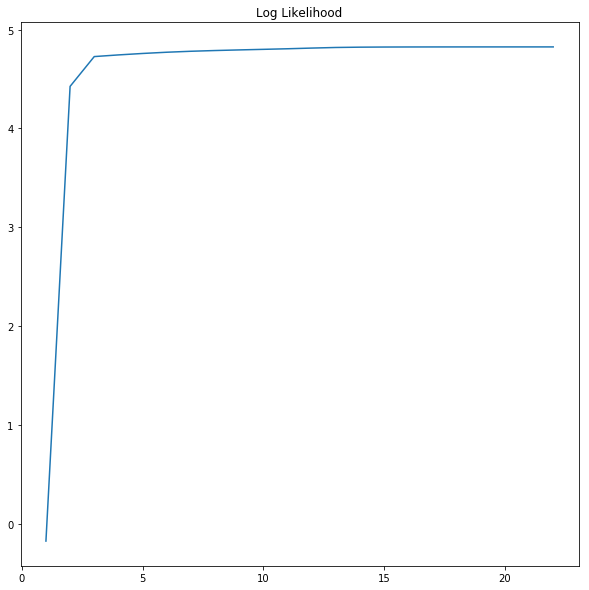

In [16]:
plt.figure(figsize=(10, 10))
plt.title('Log Likelihood')
plt.plot(np.arange(1, len(log_likelihoods)+1), log_likelihoods)
plt.show()

Great, the log likelihood increased for each iteration. we can see that after 15 Iterations, the function has almost converged.

Let's now plot the difference between new cluster means and old cluster means. this difference should decrease with time as the model converge.

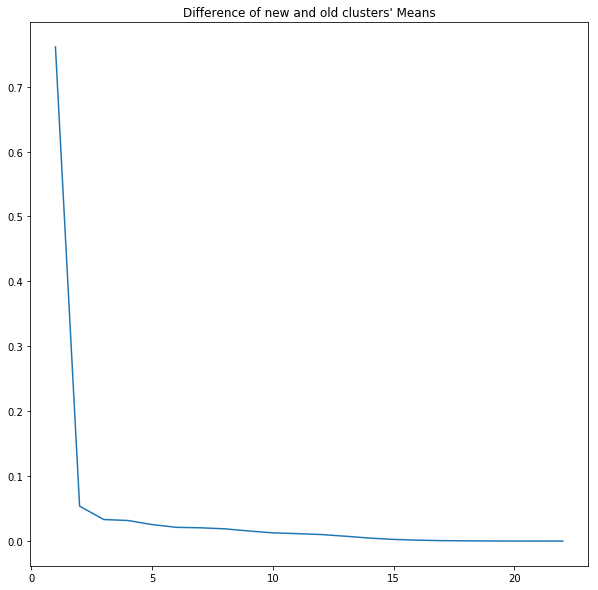

In [17]:
plt.figure(figsize=(10, 10))
plt.title('Difference of new and old clusters\' Means')
plt.plot(np.arange(1, len(cluster_means_diffs)+1), cluster_means_diffs)
plt.show()

Let's now create a function to plot the results by comparing our custom model and the sklearn model. beside that, the function will plot the original PCA data and the PCA data labeled by the custom model. for the cluster label plot, to pick colors, the function will use the probabilities for each data to belong to each of the clusters. this way will see that some of the data have a strange color that is in between the colors used in the neighboring clusters.

In [18]:
# Visualization function for GMM
from sklearn.mixture import GaussianMixture
from matplotlib.colors import to_hex, to_rgb

def plot_GMM(df,low_dim_df,cents,cluster_assignments,clusters = 3):
    
    """ 

    we will have two sections. 
    
    Section 1: we will plot the original iris data. this will generate labels that are assigned to each data point and
    cluster centroids. 
    
    Section 2: Using the assigned clusters and corresponding probabilities, we will calculate the centroids for the projected low dimension data points used
    solely for the purpose of plotting the data in two dimensions. this section is for the sake of presenting exactly how the centroids
    were chosen, we decided to use a low dimension data for plotting.
    """
    # Create figure
    fig, (axs) = plt.subplots(1,2, figsize = (12,6))
    
    # Go thorugh all data sets 
    for ax, df in zip([axs], [df]):
        
        #Section 1
        # Pull out point data
        points = df.iloc[:,:4].values
        
        
        #Calculate centers from sklearn
        GMM = GaussianMixture(clusters, n_init=1,covariance_type='diag').fit(points)
        cluster_assignments_sk = GMM.predict_proba(points)
        
        
        
        #section 2
        
        #Calculate centers of the low dimension data projection
        low_dim_cents_custom = update_clusters_GMM(low_dim_df.iloc[:,:2].values, cluster_assignments)
        
        
        def to_cluster_format(index):
            zeros_clust = np.array([0,0,0])
            zeros_clust[index:index+1] = 1
            
            return zeros_clust
            
        low_dim_cents_sk = update_clusters_GMM(low_dim_df.iloc[:,:2].values, cluster_assignments_sk)
        
        
        #calculate the actual centers of our GMM clustering with sklearn
        cent_sk = GMM.means_
        
        #assign colors according to probabilities
        def find_hex(p, colors):
            p = p.reshape(-1,1)
            return to_hex(np.sum(p*colors, axis=0))
        
        colors = ['#190BF5', '#0B5A07', '#DA8DB9']#[:clusters]
        colors = [np.array(to_rgb(c)) for c in colors]
        colors = np.array(colors)
        
        plot_colors = [find_hex(p,colors) for p in cluster_assignments]
        
        
        # Plot each distribution in different color
        axs[0].set_title('Original CPA')
        for cat, col in zip(low_dim_df['label'].unique(), ['#190BF5', '#0B5A07', '#DA8DB9']):
                axs[0].scatter(low_dim_df[low_dim_df.label == cat].X1, low_dim_df[low_dim_df.label == cat].X2, 
                           label = None, c = col, alpha = .45)

        axs[1].set_title('Cluster Labeled CPA')
        axs[1].scatter(low_dim_df.X1, low_dim_df.X2, label = None, c = plot_colors, alpha = .45)
        # Plot Calculated centers
        
        only_low_dim_cents_custom = np.array([ mu for mu,pi,sigma in low_dim_cents_custom])
        only_low_dim_cents_sk = np.array([ mu for (mu,pi,sigma) in low_dim_cents_sk])
        
        axs[1].scatter(only_low_dim_cents_custom[:,0], only_low_dim_cents_custom[:,1], c = 'k', marker = 'x', label = 'Custom', s = 70)
        axs[1].scatter(only_low_dim_cents_sk[:,0], only_low_dim_cents_sk[:,1], c = 'r', marker = '+', label = 'sklearn', s = 70)
        
        # Add legend
        axs[1].legend()

CPU times: user 75.3 ms, sys: 4.93 ms, total: 80.3 ms
Wall time: 112 ms


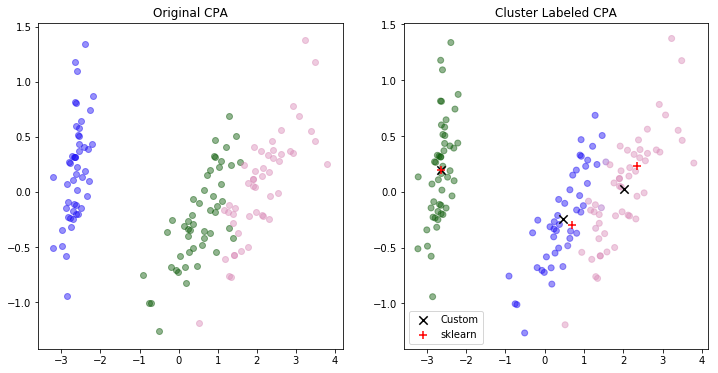

In [19]:
%%time
plot_GMM(df,low_dim_df,cents,cluster_assignments,3)

As you can see, our custom GMM model has done a very good job. observing the colors between the two plots, you will see that unlike the hard clustering with K-means, some data seem to be assigned to part to one cluster and part to another. this is the work of the probabilities that GMM allows us to quantify. also notice how centroids for our custom GMM and centroids for sklearn GMM are close to each other without being the same. this is because we are using different initial cluster assignment. 

As a bonu, let's make an animation that shows how our GMM updated the Means of the three Normal distributions until convergence.

In [ ]:
import matplotlib.colors as colors
from matplotlib.patches import Ellipse
from PIL import Image
import imageio
import matplotlib.animation as ani
def create_cluster_animation(df, history, scores):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    colorset = ['#190BF5', '#0B5A07', '#DA8DB9']
    images = []
    
    #assign colors according to probabilities
    def find_hex(p, colors):
        p = p.reshape(-1,1)
        return to_hex(np.sum(p*colors, axis=0))
    
    for j, clusters in enumerate(history):
      
        idx = 0
      
        if j % 3 != 0:
            continue
        
        plt.cla()
        
        low_dim_cents_custom = update_clusters_GMM(low_dim_df.iloc[:,:2].values, scores[j])
        for cluster in low_dim_cents_custom:
            mu = cluster[0]
            cov = cluster[2]
            
            eigenvalues, eigenvectors = np.linalg.eigh(cov)
            order = eigenvalues.argsort()[::-1]
            eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
            vx, vy = eigenvectors[:,0][0], eigenvectors[:,0][1]
            theta = np.arctan2(vy, vx)

            color = colors.to_rgba(colorset[idx])

            for cov_factor in range(1, 4):
                ell = Ellipse(xy=mu, width=np.sqrt(eigenvalues[0]) * cov_factor * 2, height=np.sqrt(eigenvalues[1]) * cov_factor * 2, angle=np.degrees(theta), linewidth=2)
                ell.set_facecolor((color[0], color[1], color[2], 1.0 / (cov_factor * 4.5)))
                ax.add_artist(ell)

            ax.scatter(mu[0], mu[1], c=colorset[idx], s=1000, marker='+')
            idx += 1

        #for i in range(df.shape[0]):
            
        custom_colors = [np.array(to_rgb(c)) for c in colorset]
        custom_colors = np.array(custom_colors)

        plot_colors = [find_hex(p,custom_colors) for p in scores[j]]
            
        ax.scatter(df.X1, df.X2, c=plot_colors, marker='o')
        
        fig.canvas.draw()
        
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        images.append(image)
    
    kwargs_write = {'fps':1.0, 'quantizer':'nq'}
    imageio.mimsave('./gmm.gif', images, fps=1)
    plt.show(Image.open('gmm.gif').convert('RGB'))
    
    
create_cluster_animation(low_dim_df, history, cluster_assign_history)

![SegmentLocal](gmm.gif "segment")

### Summary
In this tutorial we've covered some of the mathematical logic behind GMM and EM. we've seen that GMM is a probabilistic model than it is a clustering algorithm and easy to implement. in real life, you will spend most of the time identifying the right K number of clusters for your dataset. we have not covered technics on how to do this.

In a nutshell, GMM is a soft clustering algorithm in a sense that each data point is assigned to a cluster with some degrees of uncertainty. 

I hope you enjoyed the tutorial.

## Recognition:

I would like to thank  [Prof John W. Paisley](https://www.ee.columbia.edu/john-w-paisley) and [mathematicalmonk channel](https://www.youtube.com/channel/UCcAtD_VYwcYwVbTdvArsm7w) withoum whom I could not easily derive the mathematical formula behind K-means algorithm. a big thanks to Emeritus institute of management and and [Oscar Contreras Carrasco](https://towardsdatascience.com/@OscarContrerasC) from whom I got most of the code used in this tutorial  your contribution to the wide spread of AI and ML is much appreciated.